# Introdução

Graças a uma forte herança colonial, a maioria dos países que foram colonias lidam com profundos problemas em sua qualidade de vida, afetando diretamente seu IDH. Será possível identificar antigas colônias baseando-se em sua economia atual?

### Existe correlação entre o IDH de um país e a participação da agricultura em seu PIB? E sua industria?

É esperado que exista uma relação inversa em relação à agricultura, ou seja, quanto maior o IDH, menor a participação da agricultura em seu PIB. Espera-se isso pois países com menor IDH possuem forte tradição agrícola devido a longos períodos de colonização.

Em relação à industria, é esperado que exista relação direta com a industria, pois, países mais desenvolvidos tendem a ter grandes empresas e, portanto, grandes industrias.

# Análises e explicação dos resultados

### ** importando bibliotecas ** 

In [7]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import os
meu_diretorio = "/home/tluigimm/codigos/Projeto1/"
os.chdir(meu_diretorio)

### ** importar data frames ** 

dados foram coletados do site: https://www.gapminder.org/:

In [8]:
# data freme com IDH's
df_IDH = pd.read_excel("Indicator_HDI.xlsx")

# data frame com porcentagem relativa à agricultura no PIB
df_agr = pd.read_excel("Agriculture (p of GDP).xlsx")

# data frame com porcentagem relatica à industria no PIB
df_ind = pd.read_excel("Industry (p of GDP).xlsx")


### ** selecionar coluna referente ao ano de 2008 ** 

In [9]:
ind_08 = df_ind.loc[:,["Industry, value added (% of GDP)","2008"]]
IDH_08 = df_IDH.loc[:,["HDI",2008]]
agr_08 = df_agr.loc[:,["Agriculture, value added (% of GDP)",2008]]

### ** setar index **

In [41]:
ind_idx = ind_08.set_index("Industry, value added (% of GDP)").add_suffix("_industria(%PIB)")
IDH_idx = IDH_08.set_index("HDI").add_suffix("_IDH")
agr_idx = agr_08.set_index("Agriculture, value added (% of GDP)").add_suffix("_agricultura(%PIB)")

### ** juntando data frames **

In [48]:
df = IDH_idx.join(agr_idx, how='inner')

df = ind_idx.join(df, how='inner')

### ** limpando data frame **

In [49]:
df.dropna(inplace=True)
df.head()

,2008_industria(%PIB),2008_IDH,2008_agricultura(%PIB)
Afghanistan,25.978376,0.370,28.134488
Albania,19.086442,0.733,20.304655
Algeria,62.118578,0.686,6.920100
Angola,67.486780,0.476,6.642216
Argentina,32.277717,0.786,9.837196


# Conclusão

### ** plotando gráficos **

In [64]:
#função para calcular reta média em gráfico de dispersão

def reta(dados_x, dados_y, eixo_x, eixo_y, nome_grafico):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()
 
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title(nome_grafico)
    plt.xlabel(eixo_x)
    plt.ylabel(eixo_y)
 
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')
 
    plt.tight_layout()
    plt.show()
    

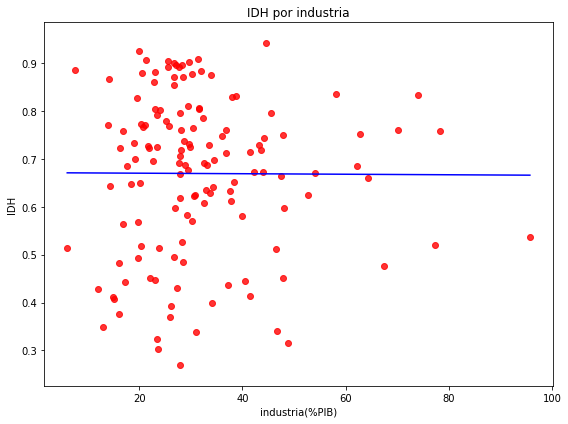

In [65]:
reta(df["2008_industria(%PIB)"], df["2008_IDH"], "industria(%PIB)", "IDH", "IDH por industria")

### concluimos que: 

#### A suposição inicial estava errada, a participação da industria no PIB não tem relação com o IDH do país.

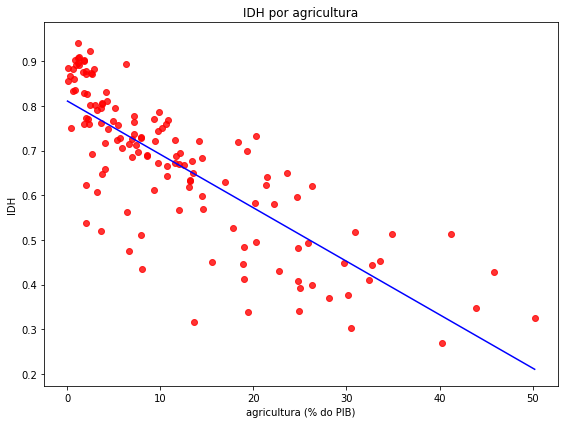

In [66]:
reta(df["2008_agricultura(%PIB)"], df["2008_IDH"], "agricultura (% do PIB)", "IDH", "IDH por agricultura")

### concluimos que:

#### A expectativa inicial estava correta, países com maior IDH tendem a ter setor agrícola com menor participação no PIB

Para dar uma certeza matemática as conclusões, será utilizada a correlação de Pearson

In [67]:
# correlação de Pearson entre a industria e o IDH

ind_idh = df.loc[:,["2008_industria(%PIB)", "2008_IDH"]] 
ind_idh.corr()

,2008_industria(%PIB),2008_IDH
2008_industria(%PIB),1.000000,-0.004855
2008_IDH,-0.004855,1.000000


Podemos garantir que não há relação entre a industria e o IDH de um país pois o valor de sua correlação deu, aproximadamente, 0.

In [60]:
# correlação de Pearson entre a agricultura e o IDH

agr_idh = df.loc[:,["2008_agricultura(%PIB)", "2008_IDH"]] 
agr_idh.corr()

,2008_agricultura(%PIB),2008_IDH
2008_agricultura(%PIB),1.000000,-0.797394
2008_IDH,-0.797394,1.000000


Podemos garantir que há relação inversa entre agricultura e IDH, pois o valor é próximo de -1.